Importing necessary libraries

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [274]:

final_dataset = pd.read_csv('final_dataset.csv')
original_dataset = final_dataset.copy(deep = True)
original_dataset.to_csv(r'D:\SPRINGBOAT_PROJECT\New folder\original_dataset.csv',index = False)

In [275]:
final_dataset.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1.0,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2.0,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3.0,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4.0,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [276]:
final_dataset.shape

(22869, 18)

In [277]:
final_dataset.drop(columns=['id'],inplace = True)

In [278]:
final_dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [279]:
print(final_dataset.agg(['min', 'max']))

     Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
min  Female  14.0    1.45    39.0                             no   no   1.0   
max    Male  61.0    1.98   173.0                            yes  yes   3.0   

     NCP    CAEC SMOKE  CH2O  SCC  FAF  TUE    CALC      MTRANS  \
min  1.0  Always    no   1.0   no  0.0  0.0  Always  Automobile   
max  4.0      no   yes   3.0  yes  3.0  2.0      no     Walking   

              NObeyesdad  
min  Insufficient_Weight  
max  Overweight_Level_II  


#Renaming the columns for better understanding


In [280]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22869 entries, 0 to 22868
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          22869 non-null  object 
 1   Age                             22869 non-null  float64
 2   Height                          22869 non-null  float64
 3   Weight                          22869 non-null  float64
 4   family_history_with_overweight  22869 non-null  object 
 5   FAVC                            22869 non-null  object 
 6   FCVC                            22869 non-null  float64
 7   NCP                             22869 non-null  float64
 8   CAEC                            22869 non-null  object 
 9   SMOKE                           22869 non-null  object 
 10  CH2O                            22869 non-null  float64
 11  SCC                             22869 non-null  object 
 12  FAF                             

In [281]:
new_columns = ['Gender', 'Age', 'Height', 'Weight', 'Family_history_with_overweight', 'FCOHCF', 'FCOV', 'NMM', 'COFBM', 'Smoke', 'CH2O', 'Calorie_Consump_Monitoring', 'Physical_Activity_F', 'Time_using_techno_D', 'Consumption_Alc', 'MTRANS', 'NObesity']
print('Length of new columns :- ',len(new_columns))

final_dataset.columns = new_columns

Length of new columns :-  17


In [282]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22869 entries, 0 to 22868
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          22869 non-null  object 
 1   Age                             22869 non-null  float64
 2   Height                          22869 non-null  float64
 3   Weight                          22869 non-null  float64
 4   Family_history_with_overweight  22869 non-null  object 
 5   FCOHCF                          22869 non-null  object 
 6   FCOV                            22869 non-null  float64
 7   NMM                             22869 non-null  float64
 8   COFBM                           22869 non-null  object 
 9   Smoke                           22869 non-null  object 
 10  CH2O                            22869 non-null  float64
 11  Calorie_Consump_Monitoring      22869 non-null  object 
 12  Physical_Activity_F             

In [283]:
# Gender distribution
print("Gender distribution:")
print(final_dataset['Gender'].value_counts())

# Age distribution
print("Age distribution:")
print(final_dataset['Age'].value_counts())

# Family history with overweight
print("\nFamily history with overweight:")
print(final_dataset['Family_history_with_overweight'].value_counts())

# Frequent consumption of high-calorie food (FCOHCF)
print("\nFrequent consumption of high-calorie food (FCOHCF):")
print(final_dataset['FCOHCF'].value_counts())

# Consumption of food between meals (fcov)
print("\nConsumption of food between meals (FCOV):")
print(final_dataset['FCOV'].value_counts())

# Consumption of food between meals (COFBM)
print("\nConsumption of food between meals (COFBM):")
print(final_dataset['COFBM'].value_counts())

# Smoking habits
print("\nSmoking habits:")
print(final_dataset['Smoke'].value_counts())

# Calorie consumption monitoring
print("\nCalorie consumption monitoring:")
print(final_dataset['Calorie_Consump_Monitoring'].value_counts())

# Alcohol consumption (Consumption_Alc)
print("\nAlcohol consumption (Consumption_Alc):")
print(final_dataset['Consumption_Alc'].value_counts())

# Mode of transportation (MTRANS)
print("\nMode of transportation (MTRANS):")
print(final_dataset['MTRANS'].value_counts())

# Obesity levels (NObesity)
print("\nObesity levels (NObesity):")
print(final_dataset['NObesity'].value_counts())

Gender distribution:
Gender
Female    11465
Male      11404
Name: count, dtype: int64
Age distribution:
Age
18.000000    2044
26.000000    1907
21.000000    1739
23.000000    1291
19.000000     945
             ... 
28.367765       1
19.233541       1
18.702587       1
17.024853       1
25.777565       1
Name: count, Length: 1739, dtype: int64

Family history with overweight:
Family_history_with_overweight
yes    18740
no      4129
Name: count, dtype: int64

Frequent consumption of high-calorie food (FCOHCF):
FCOHCF
yes    20848
no      2021
Name: count, dtype: int64

Consumption of food between meals (FCOV):
FCOV
3.000000    8310
2.000000    8253
1.000000     308
2.967300     123
2.766612      55
            ... 
2.038774       1
2.503244       1
2.165408       1
2.988668       1
2.525884       1
Name: count, Length: 975, dtype: int64

Consumption of food between meals (COFBM):
COFBM
Sometimes     19294
Frequently     2714
Always          531
no              330
Name: count, dtype: in

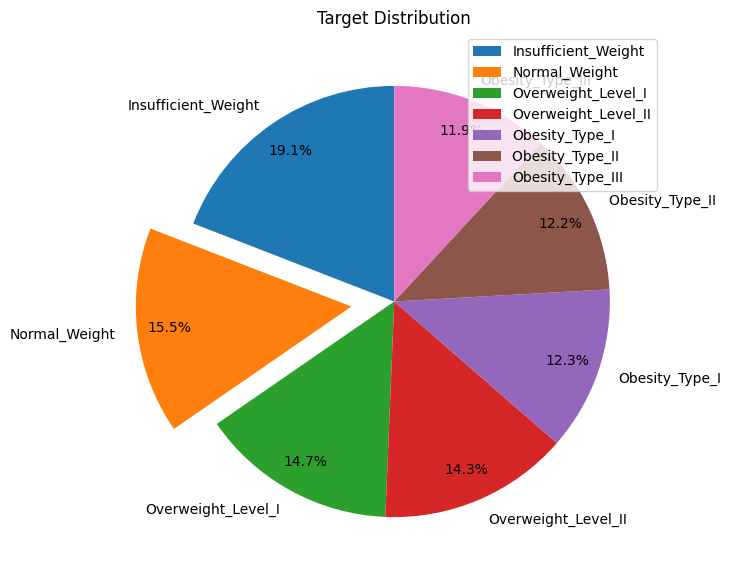

None


In [284]:
# Pie chart of target variable checking a which class dominates the dataset
plt.figure(figsize=(7, 7))
myexplode = [ 0, 0.2, 0, 0, 0, 0, 0]
plt.pie(final_dataset['NObesity'].value_counts(), labels=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II ', 'Obesity_Type_III'],
        autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=myexplode)
plt.legend(loc='upper right')
plt.title("Target Distribution")
print(plt.show())

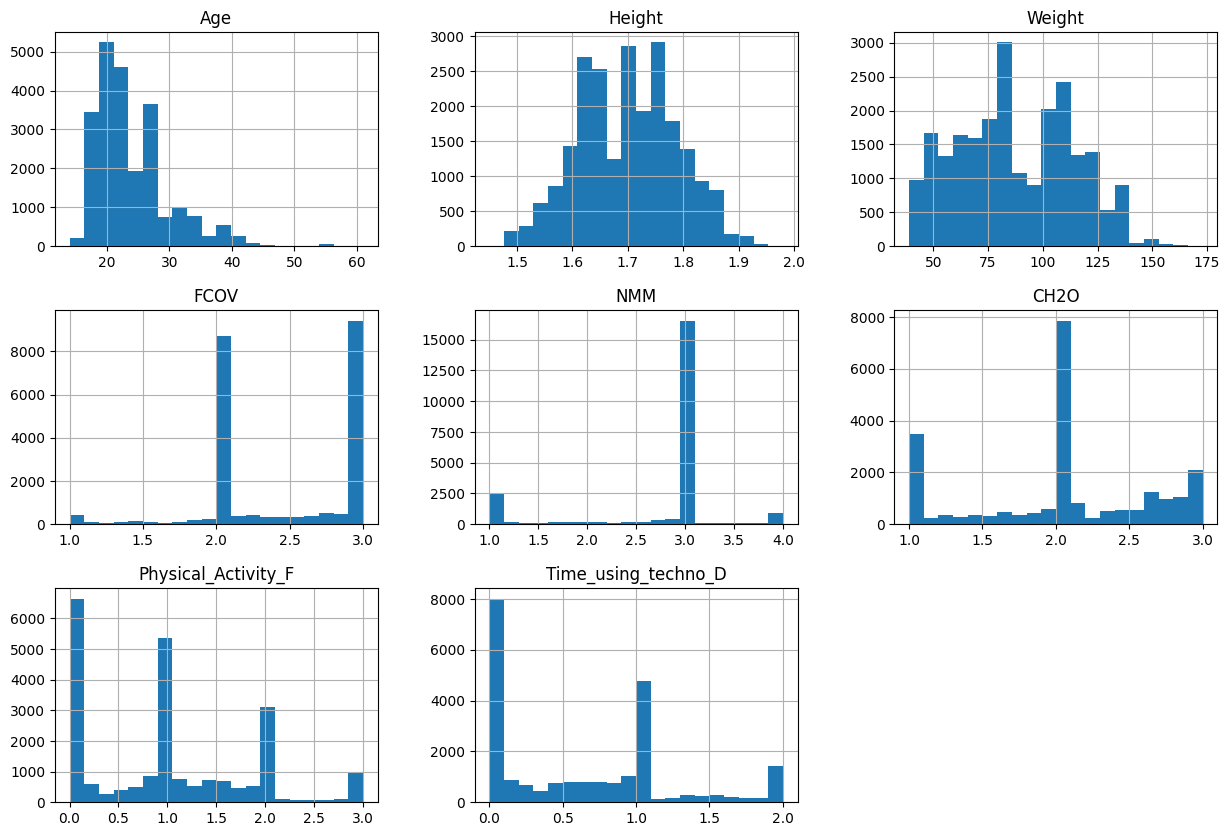

In [285]:
# Plotting histogram
final_dataset.hist(figsize=(15,10), bins=20)
plt.show()

In [286]:
# Checking for not available values
final_dataset.isna().any()
final_dataset.isna().sum()


Gender                            0
Age                               0
Height                            0
Weight                            0
Family_history_with_overweight    0
FCOHCF                            0
FCOV                              0
NMM                               0
COFBM                             0
Smoke                             0
CH2O                              0
Calorie_Consump_Monitoring        0
Physical_Activity_F               0
Time_using_techno_D               0
Consumption_Alc                   0
MTRANS                            0
NObesity                          0
dtype: int64

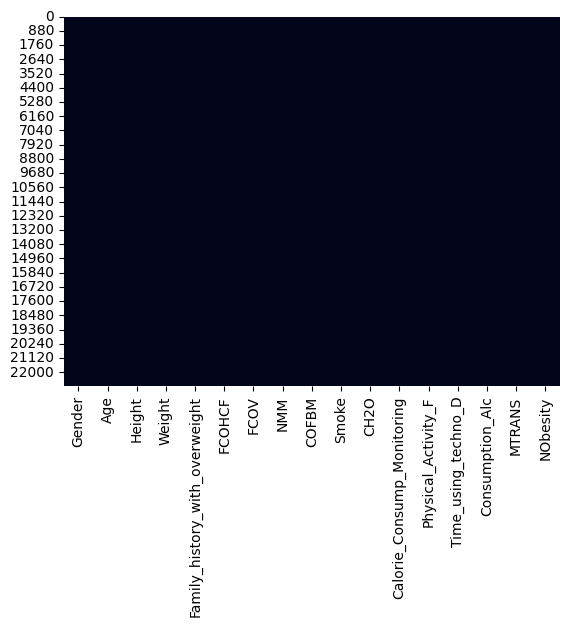

In [287]:
# Heatmap of null values
sns.heatmap(final_dataset.isnull(), cbar=False)
plt.show()

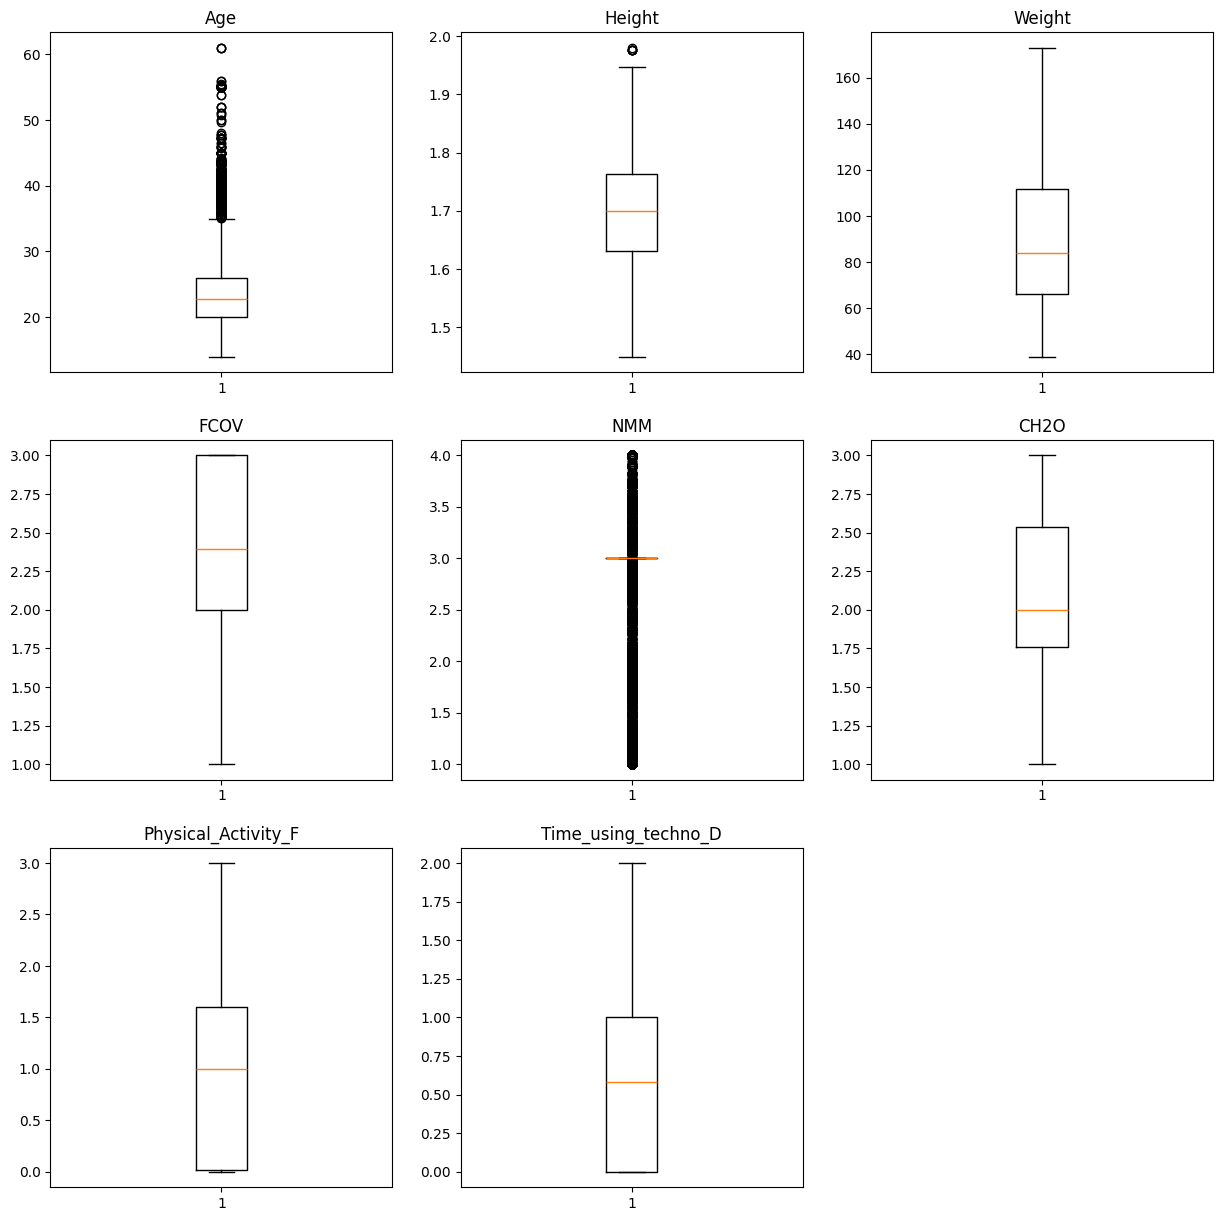

In [288]:
# Box plot
plt.figure(figsize=(15,15))
plt.subplot(3,3,1) #four rows,2columns 1 fig of size 15,35 inches
plt.boxplot(final_dataset.Age)
plt.title('Age')
plt.subplot(3,3,2) #4rows,1 column 2nd fig
plt.boxplot(final_dataset.Height)
plt.title('Height')
plt.subplot(3,3,3)
plt.boxplot(final_dataset.Weight)
plt.title('Weight')
plt.subplot(3,3,4)
plt.boxplot(final_dataset.FCOV)
plt.title('FCOV')
plt.subplot(3,3,5)
plt.boxplot(final_dataset.NMM)
plt.title('NMM')
plt.subplot(3,3,6)
plt.boxplot(final_dataset.CH2O)
plt.title('CH2O')
plt.subplot(3,3,7)
plt.boxplot(final_dataset.Physical_Activity_F)
plt.title('Physical_Activity_F')
plt.subplot(3,3,8)
plt.boxplot(final_dataset.Time_using_techno_D)
plt.title('Time_using_techno_D')
plt.show()

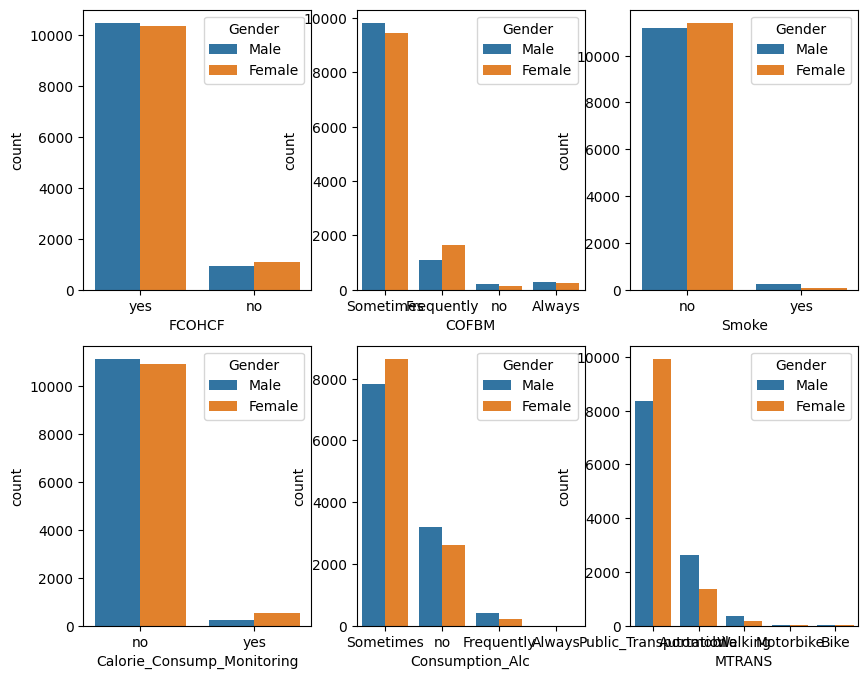

In [289]:
# Countplot for catagorical atributes  checking the imbalance in data
plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.countplot(data= final_dataset, x ='FCOHCF',hue='Gender')
plt.subplot(2,3,2)
sns.countplot(data= final_dataset, x ='COFBM',hue='Gender')
plt.subplot(2,3,3)
sns.countplot(data= final_dataset, x ='Smoke',hue='Gender')
plt.subplot(2,3,4)
sns.countplot(data= final_dataset, x ='Calorie_Consump_Monitoring',hue='Gender')
plt.subplot(2,3,5)
sns.countplot(data= final_dataset, x ='Consumption_Alc',hue='Gender')
plt.subplot(2,3,6)
sns.countplot(data= final_dataset, x ='MTRANS',hue='Gender')
plt.show()

In [290]:
###########   preprocessing   ############

# since no missing donot need to handle it

# Check for any remaining duplicates values
print(final_dataset.duplicated().any()) #true

# Drpping duplicates
print(final_dataset.drop_duplicates(inplace=True))


True
None


In [291]:
print(final_dataset.shape)

(22845, 17)


In [292]:
## Handeling outliers ##
#since outliers seen in weight, age, height, nmm

for cols in final_dataset.columns:
    if final_dataset[cols].dtype == object :       # Selecting only numerical column
        continue
    else:
        Q1 = final_dataset[cols].quantile(q=0.25)
        Q3 = final_dataset[cols].quantile(q=0.75)
        iqr = Q3-Q1

        low = Q1 - 1.5*(Q3-Q1) #lower bound for q1
        high = Q3 + 1.5*(Q3-Q1) #higher bound for q3
        final_dataset.loc[(final_dataset[cols]<low) | (final_dataset[cols]>high),cols] = final_dataset[cols].median()
         # Replacing outliers with median

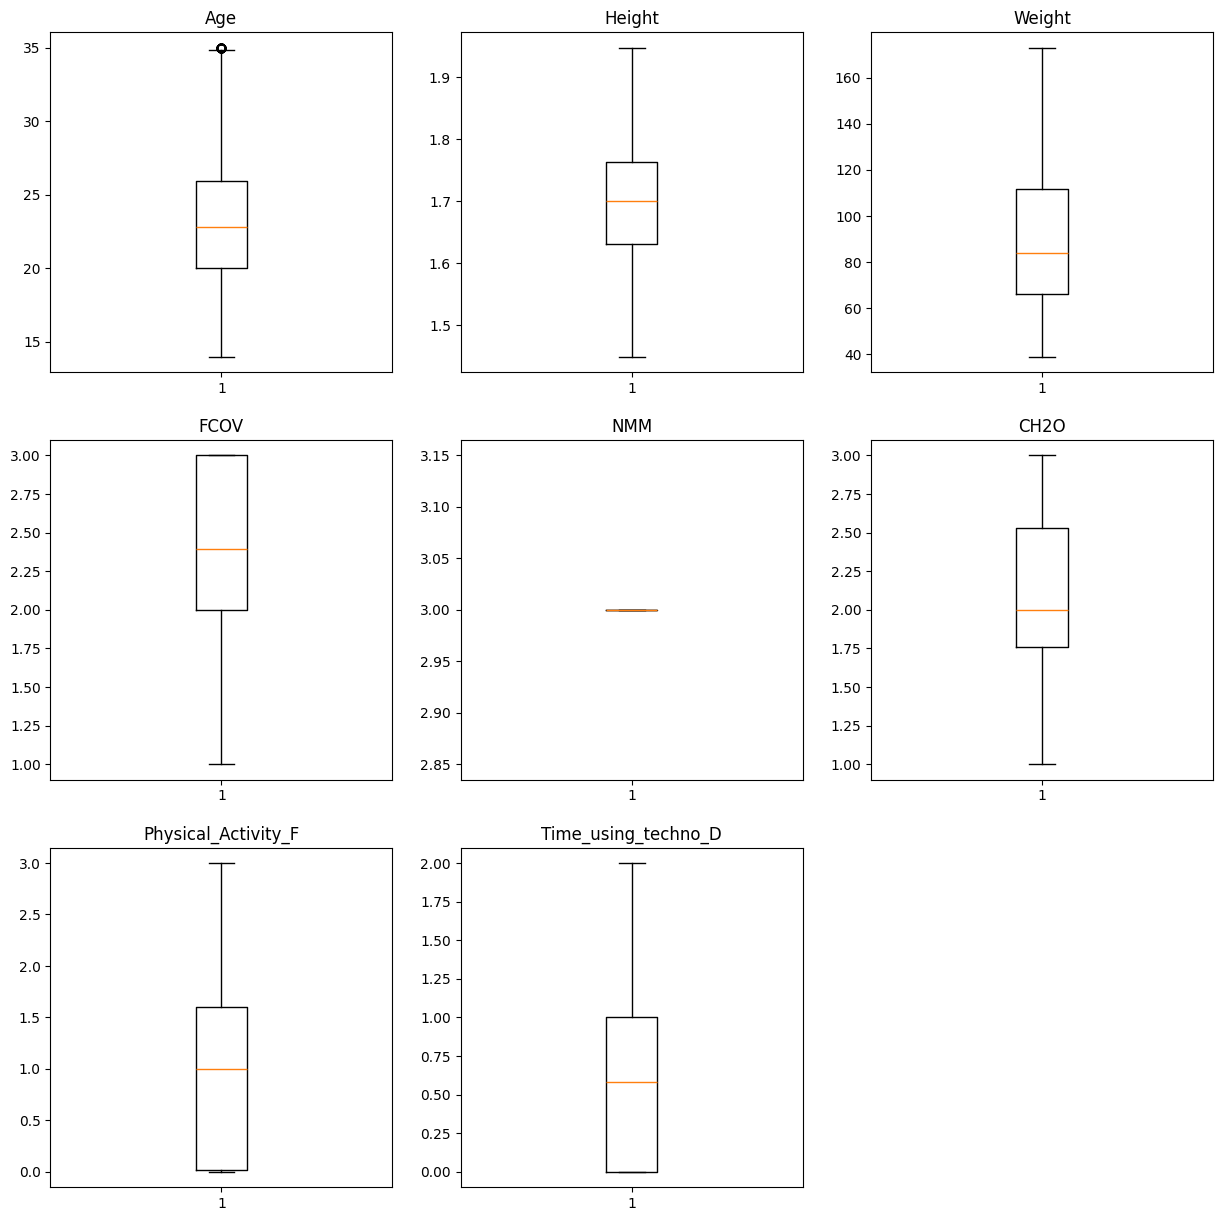

In [293]:
# Box plot
plt.figure(figsize=(15,15))
plt.subplot(3,3,1) #four rows,2columns 1 fig of size 15,35 inches
plt.boxplot(final_dataset.Age)
plt.title('Age')
plt.subplot(3,3,2) #4rows,1 column 2nd fig
plt.boxplot(final_dataset.Height)
plt.title('Height')
plt.subplot(3,3,3)
plt.boxplot(final_dataset.Weight)
plt.title('Weight')
plt.subplot(3,3,4)
plt.boxplot(final_dataset.FCOV)
plt.title('FCOV')
plt.subplot(3,3,5)
plt.boxplot(final_dataset.NMM)
plt.title('NMM')
plt.subplot(3,3,6)
plt.boxplot(final_dataset.CH2O)
plt.title('CH2O')
plt.subplot(3,3,7)
plt.boxplot(final_dataset.Physical_Activity_F)
plt.title('Physical_Activity_F')
plt.subplot(3,3,8)
plt.boxplot(final_dataset.Time_using_techno_D)
plt.title('Time_using_techno_D')
plt.show()

In [294]:
numerical_features=['Age', 'Height', 'Weight', 'FCOV', 'NMM', 'CH2O', 'Physical_Activity_F', 'Time_using_techno_D']

In [295]:
final_dataset['Gender'], c =pd.factorize(final_dataset['Gender'])
final_dataset['Family_history_with_overweight'], c = pd.factorize(final_dataset['Family_history_with_overweight'])
final_dataset['FCOHCF'], c = pd.factorize(final_dataset['FCOHCF'])
final_dataset['Smoke'], c = pd.factorize(final_dataset['Smoke'])
final_dataset['Calorie_Consump_Monitoring'], c = pd.factorize(final_dataset['Calorie_Consump_Monitoring'])

In [296]:
def dummies(x,final_dataset):
    temp = pd.get_dummies(final_dataset[x], drop_first = True) # getting encodded values for categorical values
    final_dataset = pd.concat([final_dataset, temp], axis = 1)            # conating categorical vaues with encodded values
    final_dataset.drop([x], axis = 1, inplace = True)          # dropping categorical column
    return final_dataset

In [297]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_dataset['NObesity'] = le.fit_transform(final_dataset['NObesity'])
final_dataset['COFBM'] = le.fit_transform(final_dataset['COFBM'])
final_dataset['Consumption_Alc'] = le.fit_transform(final_dataset['Consumption_Alc'])
final_dataset['MTRANS'] = le.fit_transform(final_dataset['MTRANS'])

In [298]:
final_dataset.head()

,Gender,Age,Height,Weight,Family_history_with_overweight,FCOHCF,FCOV,NMM,COFBM,Smoke,CH2O,Calorie_Consump_Monitoring,Physical_Activity_F,Time_using_techno_D,Consumption_Alc,MTRANS,NObesity
0,0,24.443011,1.699998,81.669950,0,0,2.000000,3.0,2,0,2.763573,0,0.000000,0.976473,2,3,6
1,1,18.000000,1.560000,57.000000,0,0,2.000000,3.0,1,0,2.000000,0,1.000000,1.000000,3,0,1
2,1,18.000000,1.711460,50.165754,0,0,1.880534,3.0,2,0,1.910378,0,0.866045,1.673584,3,3,0
3,1,20.952737,1.710730,131.274851,0,0,3.000000,3.0,2,0,1.674061,0,1.467863,0.780199,2,3,4
4,0,31.641081,1.914186,93.798055,0,0,2.679664,3.0,2,0,1.979848,0,1.967973,0.931721,2,3,6


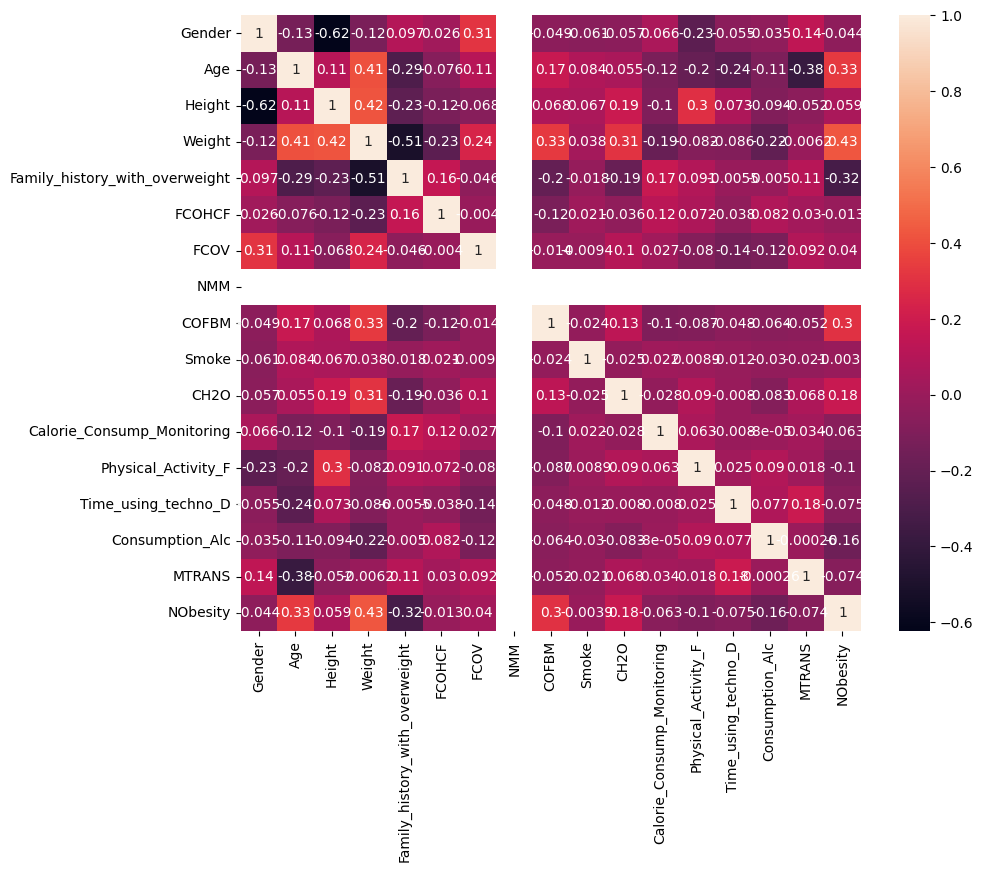

In [299]:
# Heatmap of correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(final_dataset.corr(), annot=True)
plt.show()

In [300]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22845 entries, 0 to 22868
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          22845 non-null  int64  
 1   Age                             22845 non-null  float64
 2   Height                          22845 non-null  float64
 3   Weight                          22845 non-null  float64
 4   Family_history_with_overweight  22845 non-null  int64  
 5   FCOHCF                          22845 non-null  int64  
 6   FCOV                            22845 non-null  float64
 7   NMM                             22845 non-null  float64
 8   COFBM                           22845 non-null  int32  
 9   Smoke                           22845 non-null  int64  
 10  CH2O                            22845 non-null  float64
 11  Calorie_Consump_Monitoring      22845 non-null  int64  
 12  Physical_Activity_F             22845

In [301]:
##### Train Test Split


# Now we will devide our dataframe into X and y.
# X -----> Independant features
# y -----> Target feature
x = final_dataset.iloc[:,:-1]

y = final_dataset['NObesity']

In [302]:
#importing scipy for statistical functions
from scipy import stats
print(y.info())

<class 'pandas.core.series.Series'>
Index: 22845 entries, 0 to 22868
Series name: NObesity
Non-Null Count  Dtype
--------------  -----
22845 non-null  int32
dtypes: int32(1)
memory usage: 267.7 KB
None


#skewness of data

In [303]:
print('The skewness of data is : \n',stats.skew(x))

The skewness of data is : 
 [-6.04073668e-03  7.52174985e-01  6.70291066e-03  1.06599436e-01
  1.66705048e+00  2.90033680e+00 -3.64957014e-01             nan
 -2.14404696e+00  8.72131042e+00 -2.02751446e-01  5.11973985e+00
  5.04834630e-01  6.64513302e-01  5.45237109e-01 -1.61903670e+00]


C:\Users\Rishi shah\AppData\Local\Temp\ipykernel_12004\507399423.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print('The skewness of data is : \n',stats.skew(x))


In [304]:
# Kurtosis of data  +ve > 3 -ve < 3 normal = 3
print('The kurtosis of data is :-\n',stats.kurtosis(x))

The kurtosis of data is :-
 [-1.99996351e+00  1.68967937e-01 -5.68963237e-01 -9.72851203e-01
  7.79057316e-01  6.41195355e+00 -8.66584242e-01             nan
  5.72743909e+00  7.40612555e+01 -7.56470054e-01  2.42117361e+01
 -5.08478869e-01 -4.31459676e-01 -7.02186294e-02  8.18812525e-01]


C:\Users\Rishi shah\AppData\Local\Temp\ipykernel_12004\944798947.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print('The kurtosis of data is :-\n',stats.kurtosis(x))


In [305]:
# Checking outliers using z-score
z_score = np.abs(stats.zscore(x))
final_dataset[(z_score > 3).all(axis=1)]

,Gender,Age,Height,Weight,Family_history_with_overweight,FCOHCF,FCOV,NMM,COFBM,Smoke,CH2O,Calorie_Consump_Monitoring,Physical_Activity_F,Time_using_techno_D,Consumption_Alc,MTRANS,NObesity


In [306]:
z_score # commonly > threshold of 3 or -3 considered as outlier 

,Gender,Age,Height,Weight,Family_history_with_overweight,FCOHCF,FCOV,NMM,COFBM,Smoke,CH2O,Calorie_Consump_Monitoring,Physical_Activity_F,Time_using_techno_D,Consumption_Alc,MTRANS
0,1.003025,0.364390,0.004516,0.232290,0.468306,0.311362,0.831819,NaN,0.335996,0.113193,1.210272,0.18839,1.172529,0.589741,0.476031,0.436562
1,0.996984,1.205129,1.599941,1.168077,0.468306,0.311362,0.831819,NaN,1.886306,0.113193,0.044645,0.18839,0.018358,0.628771,1.616106,2.148300
2,0.996984,1.205129,0.126106,1.427315,0.468306,0.311362,1.055798,NaN,0.335996,0.113193,0.191936,0.18839,0.141167,1.746217,1.616106,0.436562
3,0.996984,0.485842,0.117787,1.649336,0.468306,0.311362,1.043017,NaN,0.335996,0.113193,0.580319,0.18839,0.575530,0.264131,0.476031,0.436562
4,1.003025,2.117842,2.436382,0.227756,0.468306,0.311362,0.442440,NaN,0.335996,0.113193,0.077764,0.18839,1.171105,0.515499,0.476031,0.436562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22864,0.996984,0.479970,0.117787,1.654406,0.468306,0.311362,1.043017,NaN,0.335996,0.113193,0.491442,0.18839,0.823718,0.473239,0.476031,0.436562
22865,0.996984,0.234883,0.549173,1.742956,0.468306,0.311362,1.043017,NaN,0.335996,0.113193,0.036213,0.18839,0.424915,0.036023,0.476031,0.436562
22866,0.996984,0.103073,0.590449,1.740923,0.468306,0.311362,1.043017,NaN,0.335996,0.113193,0.044421,0.18839,0.511634,0.041978,0.476031,0.436562
22867,0.996984,0.344640,0.445081,1.727923,0.468306,0.311362,1.043017,NaN,0.335996,0.113193,1.356157,0.18839,0.184019,0.057979,0.476031,0.436562


In [307]:
# Creating dataframe of skewness and kurtosis
norm_data = pd.DataFrame()
norm_data['Atributes'] = x.columns
norm_data['Skewness'] = stats.skew(x)
norm_data['Kurtosis'] = stats.kurtosis(x)

C:\Users\Rishi shah\AppData\Local\Temp\ipykernel_12004\807508012.py:4: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  norm_data['Skewness'] = stats.skew(x)
C:\Users\Rishi shah\AppData\Local\Temp\ipykernel_12004\807508012.py:5: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  norm_data['Kurtosis'] = stats.kurtosis(x)


In [308]:
norm_data

,Atributes,Skewness,Kurtosis
0,Gender,-0.006041,-1.999964
1,Age,0.752175,0.168968
2,Height,0.006703,-0.568963
3,Weight,0.106599,-0.972851
4,Family_history_with_overweight,1.667050,0.779057
5,FCOHCF,2.900337,6.411954
6,FCOV,-0.364957,-0.866584
7,NMM,NaN,NaN
8,COFBM,-2.144047,5.727439
9,Smoke,8.721310,74.061255


#feature selection

In [309]:
# Performing feature selection using Decision Tree
from sklearn.tree import DecisionTreeClassifier
FS_dt = DecisionTreeClassifier(max_depth=10).fit(x, y)

In [310]:

# Creating a dataframe of feature_importances_
feature_select = pd.DataFrame()
feature_select['Features'] = x.columns
feature_select['feature_importances_'] = FS_dt.feature_importances_
feature_select.sort_values(by='feature_importances_', ascending=False)

,Features,feature_importances_
3,Weight,0.522793
0,Gender,0.221626
2,Height,0.139805
1,Age,0.048947
10,CH2O,0.018034
5,FCOHCF,0.010107
6,FCOV,0.008973
14,Consumption_Alc,0.006479
12,Physical_Activity_F,0.005899
8,COFBM,0.005887


scaling the data

In [311]:
from sklearn.preprocessing import StandardScaler
# Selecting only imp features
l = ['Weight','Height','Gender','Age','Consumption_Alc','FCOHCF','FCOV','COFBM','Physical_Activity_F','MTRANS','CH2O','Time_using_techno_D']
scaled_x = x[l]

numerical_features = ['Age', 'Height', 'Weight', 'FCOV', 'CH2O', 'Physical_Activity_F', 
                      'Time_using_techno_D']

# Separate numerical and categorical features
numerical_data = scaled_x[numerical_features]
categorical_data = scaled_x.drop(columns=numerical_features)

# Apply StandardScaler only to the numerical features
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(numerical_data)

# Convert scaled numerical data back to a DataFrame
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_features, index=x.index)

# Combine scaled numerical data with categorical data
scaled_x = pd.concat([scaled_numerical_df, categorical_data], axis=1)
scaled_x.head()



,Age,Height,Weight,FCOV,CH2O,Physical_Activity_F,Time_using_techno_D,Gender,Consumption_Alc,FCOHCF,COFBM,MTRANS
0,0.364390,-0.004516,-0.232290,-0.831819,1.210272,-1.172529,0.589741,0,2,0,2,3
1,-1.205129,-1.599941,-1.168077,-0.831819,-0.044645,0.018358,0.628771,1,3,0,1,0
2,-1.205129,0.126106,-1.427315,-1.055798,-0.191936,-0.141167,1.746217,1,3,0,2,3
3,-0.485842,0.117787,1.649336,1.043017,-0.580319,0.575530,0.264131,1,2,0,2,3
4,2.117842,2.436382,0.227756,0.442440,-0.077764,1.171105,0.515499,0,2,0,2,3


Exporting the pickle of standard scaler

In [312]:
# import pickle

# # Save the fitted scaler
# with open("scaler.pkl", "wb") as f:
#     pickle.dump(scaler, f)


In [313]:
from sklearn.model_selection import train_test_split

# Splitting dataset into training (60%), validation (20%), and test (20%)
X_train, X_rem, y_train, y_rem = train_test_split(scaled_x, y, test_size=0.4, random_state=40)

# Splitting the remaining dataset into validation (50% of the remaining 40%) and test (50% of the remaining 40%)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=40)

In [314]:
# Checking the shapes of the resulting datasets
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_val:', X_val.shape)
print('Shape of y_val:', y_val.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)
X_train.head()

Shape of X_train: (13707, 12)
Shape of y_train: (13707,)
Shape of X_val: (4569, 12)
Shape of y_val: (4569,)
Shape of X_test: (4569, 12)
Shape of y_test: (4569,)


,Age,Height,Weight,FCOV,CH2O,Physical_Activity_F,Time_using_techno_D,Gender,Consumption_Alc,FCOHCF,COFBM,MTRANS
19689,-0.460672,-0.900086,-0.674957,0.921447,-0.044645,-0.862805,-1.030185,0,2,0,3,3
13509,0.743673,-0.827151,0.916174,1.043017,0.971351,-1.172529,-0.822426,1,2,0,2,3
13611,0.012872,-1.258059,-1.433602,-0.831819,-1.688124,-1.172529,-1.030185,1,3,1,0,3
13970,0.924097,1.458658,1.259522,0.553685,1.598835,0.834556,-0.590613,0,2,0,2,3
17662,2.494102,-0.185895,-0.181838,-0.831819,-0.577571,0.018358,-1.030185,1,3,0,2,0


In [315]:
X_test.head()


,Age,Height,Weight,FCOV,CH2O,Physical_Activity_F,Time_using_techno_D,Gender,Consumption_Alc,FCOHCF,COFBM,MTRANS
10879,0.012872,-0.340084,-0.485296,-0.848242,-0.328120,-1.059523,0.508233,0,2,0,2,3
19184,-0.287206,0.546085,1.716080,1.043017,-0.658538,0.591079,0.480598,1,2,0,2,3
20268,-0.474328,-1.599941,-1.471535,-0.831819,-0.044645,2.400133,0.628771,1,2,0,0,3
21821,-0.032093,-0.278534,-0.308216,0.289429,-1.688124,-1.172529,-1.030185,1,3,0,2,0
4474,0.863263,1.251523,1.140540,0.605453,1.296459,1.160055,-1.030185,0,2,0,2,3


Implementing model

model:Logistic Regression

In [316]:

# Check for NaN and Inf in training, validation, and test sets
print("NaN values in X_train:", np.isnan(X_train).sum())
print("Inf values in X_train:", np.isinf(X_train).sum())

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)


NaN values in X_train: Age                    0
Height                 0
Weight                 0
FCOV                   0
CH2O                   0
Physical_Activity_F    0
Time_using_techno_D    0
Gender                 0
Consumption_Alc        0
FCOHCF                 0
COFBM                  0
MTRANS                 0
dtype: int64
Inf values in X_train: Age                    0
Height                 0
Weight                 0
FCOV                   0
CH2O                   0
Physical_Activity_F    0
Time_using_techno_D    0
Gender                 0
Consumption_Alc        0
FCOHCF                 0
COFBM                  0
MTRANS                 0
dtype: int64


In [317]:
from sklearn.linear_model import LogisticRegression

# Split dataset into training (60%), validation (20%), and test (20%)
X_train, X_rem, y_train, y_rem = train_test_split(scaled_x, y, test_size=0.4, random_state=40)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=40)

# Initialize the Logistic Regression model with default parameters
logreg_model = LogisticRegression(random_state=40, max_iter=1000)

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Calculate and print the training accuracy
y_train_pred = logreg_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Evaluate the model on the validation set
y_val_pred = logreg_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

# Final evaluation on the test set
y_test_pred = logreg_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Training Accuracy: 0.8624060698912964
Validation Accuracy: 0.8621142481943532
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       561
           1       0.85      0.81      0.83       702
           2       0.84      0.84      0.84       666
           3       0.94      0.96      0.95       700
           4       0.99      1.00      1.00       835
           5       0.71      0.67      0.69       552
           6       0.71      0.72      0.71       553

    accuracy                           0.86      4569
   macro avg       0.85      0.85      0.85      4569
weighted avg       0.86      0.86      0.86      4569

Validation Confusion Matrix:
 [[535  24   0   1   0   1   0]
 [ 66 569   1   0   0  59   7]
 [  1   0 561  35   4  12  53]
 [  0   0  20 673   1   0   6]
 [  0   0   1   0 833   1   0]
 [  1  66  16   0   0 372  97]
 [  0   7  68   4   1  77 396]]
Test Accuracy: 0.8664915736485007
Test Cla

model: Decision Tree

In [318]:
from sklearn.tree import DecisionTreeClassifier

# Split dataset into training (60%), validation (20%), and test (20%)
X_train, X_rem, y_train, y_rem = train_test_split(scaled_x, y, test_size=0.4, random_state=40)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=40)

# Initialize the Decision Tree Classifier with default parameters
dt_model = DecisionTreeClassifier(random_state=40)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Calculate and print the training accuracy
y_train_pred = dt_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Evaluate the model on the validation set
y_val_pred = dt_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

# Final evaluation on the test set
y_test_pred = dt_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Training Accuracy: 0.9987597577879915
Validation Accuracy: 0.8474502079229591
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       561
           1       0.79      0.80      0.80       702
           2       0.82      0.82      0.82       666
           3       0.94      0.94      0.94       700
           4       0.99      1.00      0.99       835
           5       0.68      0.66      0.67       552
           6       0.73      0.75      0.74       553

    accuracy                           0.85      4569
   macro avg       0.84      0.84      0.84      4569
weighted avg       0.85      0.85      0.85      4569

Validation Confusion Matrix:
 [[489  62   0   1   4   4   1]
 [ 53 565   3   0   0  63  18]
 [  1   1 549  36   3  37  39]
 [  0   0  37 656   1   0   6]
 [  0   0   1   0 833   1   0]
 [  3  75  23   0   0 364  87]
 [  1   8  56   3   1  68 416]]
Test Accuracy: 0.8494200043773255
Test Cla

In [320]:
'''from pickle import load
loaded_model = load(open('logistic_model.pkl', 'rb'))
sc=load(open('scaler.pkl', 'rb'))


import numpy as np
import pandas as pd

def prediction(model, sc, output_categories):
    # Input data
    l = []

    # Numerical inputs
    l.append(float(input('Enter age: ')))
    l.append(float(input('Enter height: ')))
    l.append(float(input('Enter weight: ')))
    l.append(float(input('Enter FCOV: ')))
    l.append(float(input('Enter CH2O: ')))
    l.append(float(input('Enter physical activity: ')))
    l.append(float(input('Enter time using techno: ')))

    # Categorical inputs (mapping to numerical values)
    gender_map = {'male': 1, 'female': 0}
    consumption_alc_map = {'always': 3, 'frequently': 2, 'sometimes': 0, 'no': 1}
    fcohcf_map = {'yes': 1, 'no': 0}
    cofbm_map = {'always': 3, 'frequently': 2, 'sometimes': 1, 'no': 0}
    mtrans_map = {'walking': 2, 'motorbike': 3, 'automobile': 1, 'public-transport': 0, 'bike': 4}

    # Get inputs for categorical features
    gender = input('Enter your gender (male/female): ')  
    consumption_alc = input('Enter alcohol consumption (always/frequently/sometimes/no): ')
    fcohcf = input('Enter FCOHCF (yes/no): ')
    cofbm = input('Enter COFBM (always/frequently/sometimes/no): ')
    mtrans = input('Enter MTRANS (walking/motorbike/automobile/public-transport/bike): ')

    # Map categorical inputs to numerical values
    l.append(gender_map.get(gender.lower(), 0))
    l.append(consumption_alc_map.get(consumption_alc.lower(), 0))
    l.append(fcohcf_map.get(fcohcf.lower(), 0))
    l.append(cofbm_map.get(cofbm.lower(), 0))
    l.append(mtrans_map.get(mtrans.lower(), 0))

    # Define the column names
    column_names = ['Age', 'Height', 'Weight', 'FCOV', 'CH2O', 'Physical_Activity_F', 'Time_using_techno_D',
                    'Gender', 'Consumption_Alc', 'FCOHCF', 'COFBM', 'MTRANS']

    # Convert list to numpy array and reshape to 2D
    arr = np.asarray(l).reshape(1, -1)

    # Create a pandas DataFrame
    arr_df = pd.DataFrame(arr, columns=column_names)

    # Define the numerical columns for scaling
    numerical_columns = ['Age', 'Height', 'Weight', 'FCOV', 'CH2O', 'Physical_Activity_F', 'Time_using_techno_D']

    # Scale only the numerical features
    arr_df[numerical_columns] = sc.transform(arr_df[numerical_columns])

    # Predict with the model
    prediction = model.predict(arr_df)  # Get predicted class index
    predicted_category = output_categories[int(prediction[0])]  # Map the predicted class to the category

    return predicted_category

# Assuming 'loaded_model' is your pre-trained model, 'sc' is your scaler
output_categories = [
    "Insufficient_Weight",
    "Normal_Weight",
    "Overweight_Level_I",
    "Overweight_Level_II",
    "Obesity_Type_I",
    "Obesity_Type_II",
    "Obesity_Type_III"
]

prediction_result = prediction(loaded_model, sc, output_categories)
print(f"The predicted category is: {prediction_result}")
'''

'from pickle import load\nloaded_model = load(open(\'logistic_model.pkl\', \'rb\'))\nsc=load(open(\'scaler.pkl\', \'rb\'))\n\n\nimport numpy as np\nimport pandas as pd\n\ndef prediction(model, sc, output_categories):\n    # Input data\n    l = []\n\n    # Numerical inputs\n    l.append(float(input(\'Enter age: \')))\n    l.append(float(input(\'Enter height: \')))\n    l.append(float(input(\'Enter weight: \')))\n    l.append(float(input(\'Enter FCOV: \')))\n    l.append(float(input(\'Enter CH2O: \')))\n    l.append(float(input(\'Enter physical activity: \')))\n    l.append(float(input(\'Enter time using techno: \')))\n\n    # Categorical inputs (mapping to numerical values)\n    gender_map = {\'male\': 1, \'female\': 0}\n    consumption_alc_map = {\'always\': 3, \'frequently\': 2, \'sometimes\': 0, \'no\': 1}\n    fcohcf_map = {\'yes\': 1, \'no\': 0}\n    cofbm_map = {\'always\': 3, \'frequently\': 2, \'sometimes\': 1, \'no\': 0}\n    mtrans_map = {\'walking\': 2, \'motorbike\': 3, \'au

model: Random Forest

In [321]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier with default parameters
rf_model = RandomForestClassifier(random_state=40)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Calculate and print the training accuracy
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Evaluate the model on the validation set
y_val_pred = rf_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

# Final evaluation on the test set
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Training Accuracy: 0.9987597577879915
Validation Accuracy: 0.8999781133727293
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       561
           1       0.85      0.89      0.87       702
           2       0.89      0.89      0.89       666
           3       0.97      0.97      0.97       700
           4       1.00      1.00      1.00       835
           5       0.82      0.73      0.77       552
           6       0.79      0.84      0.81       553

    accuracy                           0.90      4569
   macro avg       0.89      0.89      0.89      4569
weighted avg       0.90      0.90      0.90      4569

Validation Confusion Matrix:
 [[519  39   0   1   1   1   0]
 [ 33 625   2   0   0  29  13]
 [  1   0 593  16   1  12  43]
 [  0   0  20 677   1   0   2]
 [  0   0   1   0 833   1   0]
 [  4  68  10   0   0 403  67]
 [  0   5  40   2   0  44 462]]
Test Accuracy: 0.895163055373167
Test Clas

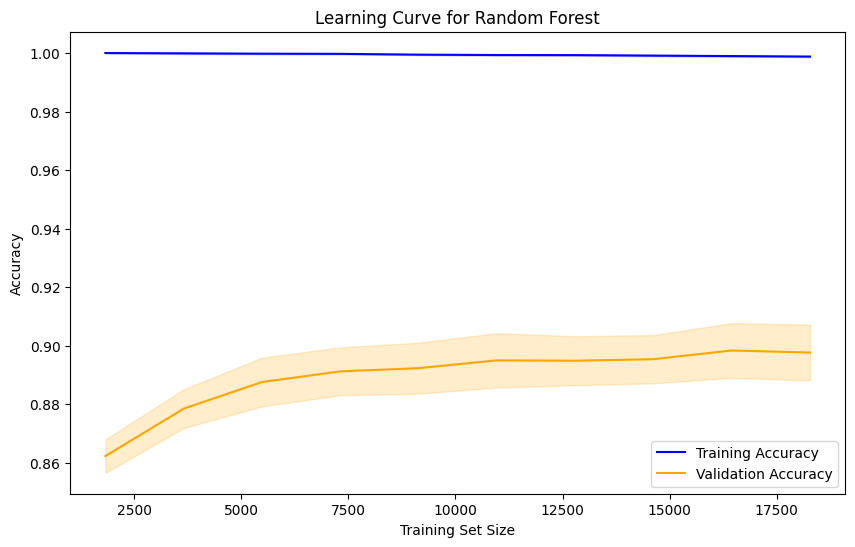

In [322]:

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    rf_model, scaled_x, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=40
)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Accuracy", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, color="blue", alpha=0.2)
plt.plot(train_sizes, val_scores_mean, label="Validation Accuracy", color="orange")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, color="orange", alpha=0.2)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Random Forest")
plt.legend(loc="best")
plt.show()

model: xgboost

In [323]:
import xgboost as xgb


# Initialize the XGBoost Classifier with default parameters
xgb_model = xgb.XGBClassifier(random_state=40)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Calculate and print the training accuracy
y_train_pred = xgb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Evaluate the model on the validation set
y_val_pred = xgb_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

# Final evaluation on the test set
y_test_pred = xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Training Accuracy: 0.9870868899102648
Validation Accuracy: 0.9089516305537316
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       561
           1       0.87      0.89      0.88       702
           2       0.90      0.90      0.90       666
           3       0.97      0.97      0.97       700
           4       1.00      1.00      1.00       835
           5       0.82      0.78      0.80       552
           6       0.83      0.85      0.84       553

    accuracy                           0.91      4569
   macro avg       0.90      0.90      0.90      4569
weighted avg       0.91      0.91      0.91      4569

Validation Confusion Matrix:
 [[524  34   0   1   0   2   0]
 [ 33 622   1   0   0  37   9]
 [  1   0 598  17   1  15  34]
 [  0   0  19 678   1   0   2]
 [  0   0   1   0 833   1   0]
 [  3  56  11   0   0 429  53]
 [  0   4  38   4   0  38 469]]
Test Accuracy: 0.908513898008317
Test Clas

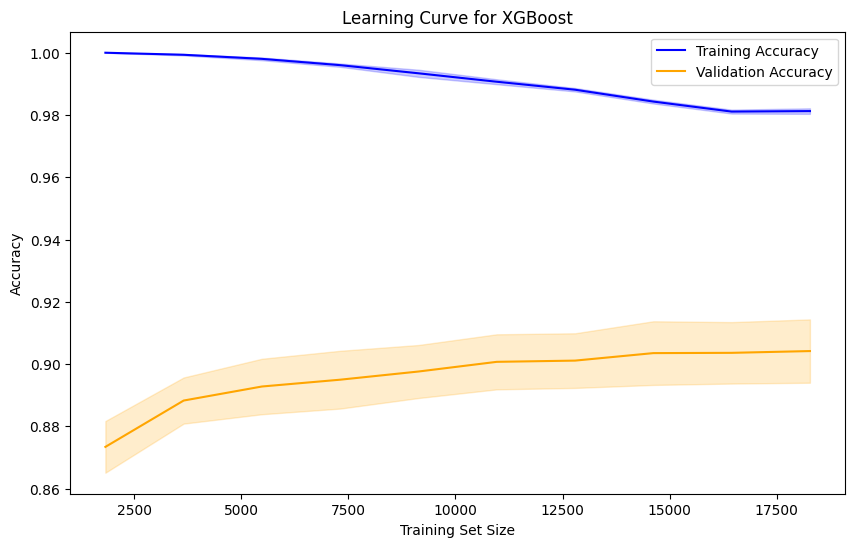

In [324]:
# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    xgb_model, scaled_x, y, cv=5, scoring='accuracy', n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=40
)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Accuracy", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, color="blue", alpha=0.2)
plt.plot(train_sizes, val_scores_mean, label="Validation Accuracy", color="orange")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, color="orange", alpha=0.2)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for XGBoost")
plt.legend(loc="best")
plt.show()

model:LightGBM

In [325]:
import lightgbm as lgb

# Initialize the LightGBM Classifier with default parameters
lgb_model = lgb.LGBMClassifier(random_state=40)

# Fit the model on the training data
lgb_model.fit(X_train, y_train)

# Calculate and print the training accuracy
y_train_pred = lgb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Evaluate the model on the validation set
y_val_pred = lgb_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

# Final evaluation on the test set
y_test_pred = lgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002897 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1798
[LightGBM] [Info] Number of data points in the train set: 13707, number of used features: 12
[LightGBM] [Info] Start training from score -2.119559
[LightGBM] [Info] Start training from score -1.927263
[LightGBM] [Info] Start training from score -1.944962
[LightGBM] [Info] Start training from score -1.870745
[LightGBM] [Info] Start training from score -1.637327
[LightGBM] [Info] Start training from score -2.151660
[LightGBM] [Info] Start training from score -2.066899
Training Accuracy: 0.9829284307288247
Validation Accuracy: 0.9082950317356095
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       561
           1       0.88      0.89      0.88       702
           2       0.89      0.90      0.89       666
   

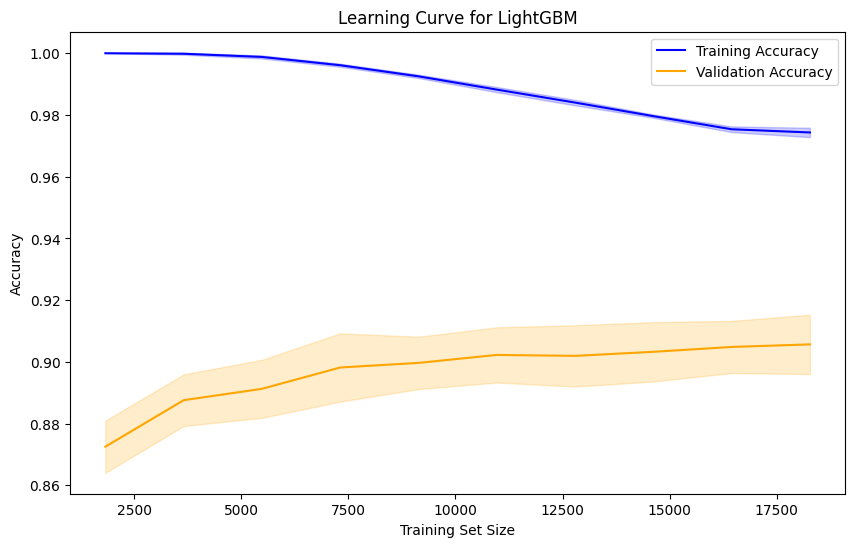

In [326]:



# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    lgb_model, scaled_x, y, cv=5, scoring='accuracy', n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=40
)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Accuracy", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, color="blue", alpha=0.2)
plt.plot(train_sizes, val_scores_mean, label="Validation Accuracy", color="orange")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, color="orange", alpha=0.2)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for LightGBM")
plt.legend(loc="best")
plt.show()


model: KNN

In [327]:
from sklearn.neighbors import KNeighborsClassifier


# Initialize the K-Nearest Neighbors Classifier with default parameters
knn_model = KNeighborsClassifier()

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Calculate and print the training accuracy
y_train_pred = knn_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Evaluate the model on the validation set
y_val_pred = knn_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

# Final evaluation on the test set
y_test_pred = knn_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Training Accuracy: 0.8401546654993799
Validation Accuracy: 0.7747866053841103
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       561
           1       0.63      0.66      0.65       702
           2       0.74      0.79      0.77       666
           3       0.92      0.95      0.93       700
           4       1.00      1.00      1.00       835
           5       0.59      0.48      0.53       552
           6       0.64      0.57      0.60       553

    accuracy                           0.77      4569
   macro avg       0.75      0.76      0.75      4569
weighted avg       0.77      0.77      0.77      4569

Validation Confusion Matrix:
 [[471  85   0   1   0   3   1]
 [115 465  13   1   0  70  38]
 [  4  13 527  37   2  26  57]
 [  0   0  27 664   0   2   7]
 [  0   1   1   0 832   0   1]
 [ 21 124  67   1   0 267  72]
 [ 10  46  76  19   0  88 314]]
Test Accuracy: 0.7555263733858613
Test Cla

Hyperparameter tuning:

model: randomforest


In [328]:
# Use a smaller subset of the data for faster experimentation
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=40)
X_train_subset.shape

(2741, 12)

In [330]:

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for splitting a node
    'max_depth': [5, 10, 15],  # The maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # The minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # The minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Initialize the Random Forest Classifier with a fixed random_state
rf_model = RandomForestClassifier(random_state=40)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, scoring='accuracy', verbose=2)
grid_search.fit(X_train_subset, y_train_subset)

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best estimator found by GridSearchCV for predictions
best_rf_model = grid_search.best_estimator_

# Evaluate the model on the training set
y_train_pred = best_rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Evaluate the model on the validation set
y_val_pred = best_rf_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

# Final evaluation on the test set
y_test_pred = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Fitting 3 folds for each of 324 candidates, totalling 972 fits


c:\Users\Rishi shah\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters: {'bootstrap': False, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}
Training Accuracy: 0.8979353614941271
Validation Accuracy: 0.8835631429196761
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       561
           1       0.80      0.87      0.84       702
           2       0.89      0.88      0.88       666
           3       0.97      0.97      0.97       700
           4       1.00      1.00      1.00       835
           5       0.80      0.67      0.73       552
           6       0.76      0.83      0.79       553

    accuracy                           0.88      4569
   macro avg       0.88      0.87      0.87      4569
weighted avg       0.88      0.88      0.88      4569

Validation Confusion Matrix:
 [[498  61   0   1   0   1   0]
 [ 38 613   0   0   0  36  15]
 [  1   0 584  21   1  17  42]
 [  0   0  17 

Hyperparameter tuinig: model: xgboost

In [ ]:


model = XGBClassifier(tree_method='gpu_hist')
print("XGBoost with GPU is ready!")


XGBoost with GPU is ready!


In [ ]:
'''

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'max_depth': [5,10],  # Maximum depth of the trees
    'learning_rate': [0.01, 0.1],  # Learning rate for boosting
    'subsample': [0.6, 0.8],  # Fraction of samples used per tree
    'colsample_bytree': [0.6, 0.8],  # Fraction of features used per tree
    'min_child_weight': [1, 5],  # Minimum sum of instance weight needed in a child
}

# Initialize the XGBoost Classifier with a fixed random_state
xgb_model = XGBClassifier(random_state=40, eval_metric='mlogloss', tree_method = "hist", device = "cuda"
)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, scoring='accuracy', verbose=2)
grid_search.fit(X_train_subset, y_train_subset)

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)
'''

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.8}


In [331]:
# Convert the data to DMatrix format, ensuring it is placed on the GPU
dtrain = xgb.DMatrix(X_train.astype('float32'), label=y_train)
dval = xgb.DMatrix(X_val.astype('float32'), label=y_val)
dtest = xgb.DMatrix(X_test.astype('float32'), label=y_test)

# Initialize the XGBoost Classifier with the best hyperparameters found
xgb_model = XGBClassifier(
    n_estimators=100,  # Based on best results
    max_depth=5,       # Based on best results
    learning_rate=0.1, # Based on best results
    subsample=0.8,     # Based on best results
    colsample_bytree=0.6,  # Based on best results
    min_child_weight=5,   # Based on best results
    random_state=40, 
    eval_metric='mlogloss', 
    tree_method='hist',  # Use GPU for training
    device='cuda',       # Ensure the device is set to 'cuda'
)

# Fit the model on the training data (DMatrix)
xgb_model.fit(X_train, y_train)

# Get the predictions on training, validation, and test sets
y_train_pred = xgb_model.predict(X_train)
y_val_pred = xgb_model.predict(X_val)
y_test_pred = xgb_model.predict(X_test)

# Calculate the accuracy for each set
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9270
Validation Accuracy: 0.9103
Test Accuracy: 0.9094


Hyperparameter tuinig: model: lightgbm

In [ ]:
'''
# Define the hyperparameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1], 
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Initialize the LightGBM Classifier with a fixed random_state
lgb_model = lgb.LGBMClassifier(random_state=40, metric='multi_logloss')

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)
'''

Fitting 3 folds for each of 486 candidates, totalling 1458 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1798
[LightGBM] [Info] Number of data points in the train set: 13707, number of used features: 12
[LightGBM] [Info] Start training from score -2.119559
[LightGBM] [Info] Start training from score -1.927263
[LightGBM] [Info] Start training from score -1.944962
[LightGBM] [Info] Start training from score -1.870745
[LightGBM] [Info] Start training from score -1.637327
[LightGBM] [Info] Start training from score -2.151660
[LightGBM] [Info] Start training from score -2.066899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

In [332]:


# Extract the best hyperparameters from the grid search
best_params = {
    'n_estimators': 200,            # From best results
    'max_depth': 5,                # From best results
    'learning_rate': 0.05,          # From best results
    'subsample': 0.6,              # From best results
    'colsample_bytree': 0.6,       # From best results
    'min_child_weight': 5,         # From best results
}

# Initialize the LightGBM Classifier with the best hyperparameters
lgb_model = lgb.LGBMClassifier(
    random_state=40, 
    metric='multi_logloss', 
    **best_params
)

# Fit the model on the entire training set
lgb_model.fit(X_train, y_train)

# Get predictions on the training, validation, and test sets
y_train_pred = lgb_model.predict(X_train)
y_val_pred = lgb_model.predict(X_val)
y_test_pred = lgb_model.predict(X_test)

# Calculate accuracy for each set
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002865 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1798
[LightGBM] [Info] Number of data points in the train set: 13707, number of used features: 12
[LightGBM] [Info] Start training from score -2.119559
[LightGBM] [Info] Start training from score -1.927263
[LightGBM] [Info] Start training from score -1.944962
[LightGBM] [Info] Start training from score -1.870745
[LightGBM] [Info] Start training from score -1.637327
[LightGBM] [Info] Start training from score -2.151660
[LightGBM] [Info] Start training from score -2.066899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

In [ ]:


# Dictionary to store results for each model
results = []

# Example models
models = {
    "XGBoost": xgb_model,  # Replace with your trained XGBoost model
    "LightGBM": lgb_model,  # Replace with your trained LightGBM model
    "knn":knn_model,
    "Logisticregression":logreg_model,
}

# Loop through each model and evaluate performance
for model_name, model in models.items():
    # Calculate accuracy on training, validation, and test sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store results in the dictionary
    results.append({
        "Model": model_name,
        "Hyperparameters": model.get_params(),
        "Training Accuracy": train_accuracy,
        "Validation Accuracy": val_accuracy,
        "Test Accuracy": test_accuracy,
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the table
print(results_df)


                Model                                    Hyperparameters  \
0             XGBoost  {'objective': 'multi:softprob', 'base_score': ...   
1            LightGBM  {'boosting_type': 'gbdt', 'class_weight': None...   
2                 knn  {'algorithm': 'auto', 'leaf_size': 30, 'metric...   
3  Logisticregression  {'C': 1.0, 'class_weight': None, 'dual': False...   

   Training Accuracy  Validation Accuracy  Test Accuracy  
0           0.926972             0.910265       0.909389  
1           0.940104             0.912235       0.913767  
2           0.840155             0.774787       0.755526  
3           0.862406             0.862114       0.866492  


From the above result we conclude that LightGBM is best model for prediction.

so i'm selecting LightGBM

In [334]:
import pickle
 # Save the fitted model
with open("lgb_model.pkl", "wb") as f:
    pickle.dump(lgb_model, f)

In [335]:
from pickle import load
loaded_model = load(open('lgb_model.pkl', 'rb'))
sc=load(open('scaler.pkl', 'rb'))


import numpy as np
import pandas as pd

def prediction(model, sc, output_categories):
    # Input data
    l = []

    # Numerical inputs
    l.append(float(input('Enter age: ')))
    l.append(float(input('Enter height: ')))
    l.append(float(input('Enter weight: ')))
    l.append(float(input('Enter FCOV: ')))
    l.append(float(input('Enter CH2O: ')))
    l.append(float(input('Enter physical activity: ')))
    l.append(float(input('Enter time using techno: ')))

    # Categorical inputs (mapping to numerical values)
    gender_map = {'male': 1, 'female': 0}
    consumption_alc_map = {'always': 3, 'frequently': 2, 'sometimes': 0, 'no': 1}
    fcohcf_map = {'yes': 1, 'no': 0}
    cofbm_map = {'always': 3, 'frequently': 2, 'sometimes': 1, 'no': 0}
    mtrans_map = {'walking': 2, 'motorbike': 3, 'automobile': 1, 'public-transport': 0, 'bike': 4}

    # Get inputs for categorical features
    gender = input('Enter your gender (male/female): ')  
    consumption_alc = input('Enter alcohol consumption (always/frequently/sometimes/no): ')
    fcohcf = input('Enter FCOHCF (yes/no): ')
    cofbm = input('Enter COFBM (always/frequently/sometimes/no): ')
    mtrans = input('Enter MTRANS (walking/motorbike/automobile/public-transport/bike): ')

    # Map categorical inputs to numerical values
    l.append(gender_map.get(gender.lower(), 0))
    l.append(consumption_alc_map.get(consumption_alc.lower(), 0))
    l.append(fcohcf_map.get(fcohcf.lower(), 0))
    l.append(cofbm_map.get(cofbm.lower(), 0))
    l.append(mtrans_map.get(mtrans.lower(), 0))

    # Define the column names
    column_names = ['Age', 'Height', 'Weight', 'FCOV', 'CH2O', 'Physical_Activity_F', 'Time_using_techno_D',
                    'Gender', 'Consumption_Alc', 'FCOHCF', 'COFBM', 'MTRANS']

    # Convert list to numpy array and reshape to 2D
    arr = np.asarray(l).reshape(1, -1)

    # Create a pandas DataFrame
    arr_df = pd.DataFrame(arr, columns=column_names)

    # Define the numerical columns for scaling
    numerical_columns = ['Age', 'Height', 'Weight', 'FCOV', 'CH2O', 'Physical_Activity_F', 'Time_using_techno_D']

    # Scale only the numerical features
    arr_df[numerical_columns] = sc.transform(arr_df[numerical_columns])

    # Predict with the model
    prediction = model.predict(arr_df)  # Get predicted class index
    predicted_category = output_categories[int(prediction[0])]  # Map the predicted class to the category

    return predicted_category

# Assuming 'loaded_model' is your pre-trained model, 'sc' is your scaler
output_categories = [
    "Insufficient_Weight",
    "Normal_Weight",
    "Overweight_Level_I",
    "Overweight_Level_II",
    "Obesity_Type_I",
    "Obesity_Type_II",
    "Obesity_Type_III"
]

prediction_result = prediction(loaded_model, sc, output_categories)
print(f"The predicted category is: {prediction_result}")


The predicted category is: Normal_Weight
